In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [168]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

C:\Users\SunaynaPC\AppData\Local\Temp\ipykernel_27728\3462665596.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


#### Data Understanding

In [14]:
loan = pd.read_csv('C:\\Users\\SunaynaPC\\Downloads\\loan\\loan.csv')
loan

C:\Users\SunaynaPC\AppData\Local\Temp\ipykernel_36296\4245973293.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('C:\\Users\\SunaynaPC\\Downloads\\loan\\loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Checking Rows With null entries__

In [4]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### Data Cleaning and Manipulation

__Removing records where null percentage__ 

In [15]:
#Removing records where null percentage 
null_percentage=loan.isnull().sum()/loan.shape[0]
columns=null_percentage[null_percentage>0.90].keys()
loan=loan.drop(columns,axis=1)
loan.shape

(39717, 55)

__cleaning irrelevant columns__

In [16]:
#cleaning irrelevant columns having null values
loan=loan.drop("mths_since_last_delinq",axis=1)
loan=loan.drop("desc",axis=1)

#cleaning irrelevant columns
loan=loan.drop("url",axis=1)
loan=loan.drop("zip_code",axis=1)

#Removed title as purpose already providing same info
loan=loan.drop("title",axis=1)


#no categorization available in the columns
loan=loan.drop("initial_list_status",axis=1)
loan=loan.drop("policy_code",axis=1)
loan=loan.drop("pymnt_plan",axis=1)
loan=loan.drop("application_type",axis=1)
loan=loan.drop("acc_now_delinq",axis=1)
loan=loan.drop("chargeoff_within_12_mths",axis=1)
loan=loan.drop("delinq_amnt",axis=1)
loan=loan.drop("tax_liens",axis=1)
loan=loan.drop("collections_12_mths_ex_med",axis=1)


#Customer behavior variables
loan=loan.drop("delinq_2yrs",axis=1)
loan=loan.drop("earliest_cr_line",axis=1)
loan=loan.drop("inq_last_6mths",axis=1)
loan=loan.drop("open_acc",axis=1)
loan=loan.drop("revol_bal",axis=1)
loan=loan.drop("revol_util",axis=1)
loan=loan.drop("total_acc",axis=1)
loan=loan.drop("out_prncp",axis=1)
loan=loan.drop("out_prncp_inv",axis=1)
loan=loan.drop("total_pymnt",axis=1)
loan=loan.drop("total_pymnt_inv",axis=1)
loan=loan.drop("total_rec_prncp",axis=1)
loan=loan.drop("total_rec_int",axis=1)
loan=loan.drop("total_rec_late_fee",axis=1)
loan=loan.drop("recoveries",axis=1)
loan=loan.drop("collection_recovery_fee",axis=1)
loan=loan.drop("last_pymnt_d",axis=1)
loan=loan.drop("last_pymnt_amnt",axis=1)
loan=loan.drop("last_credit_pull_d",axis=1)

loan.shape

(39717, 22)

__Imputing null values__

In [17]:
#Filling with Unknown where employee title is not present
loan["emp_title"]=loan["emp_title"].fillna("Unkown")

In [18]:
loan["pub_rec"].corr(loan["pub_rec_bankruptcies"])

0.8473050197507596

In [19]:
#Based on correlation between these two variables substituting the values
loan["pub_rec_bankruptcies"]=loan["pub_rec_bankruptcies"].fillna(loan["pub_rec"])
loan=loan.drop("pub_rec",axis=1)
loan.shape

(39717, 21)

In [20]:
#Filling with Unknown where employee length is not present
loan["emp_length"]=loan["emp_length"].fillna("Unkown")

__Refining Values to get new columns__

In [21]:
#Refining values
loan["int_rate"]=loan["int_rate"].str.replace('%','').astype(float)
loan["term"]=loan["term"].str.replace(' months','').astype(int)
loan.shape

(39717, 21)

In [52]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

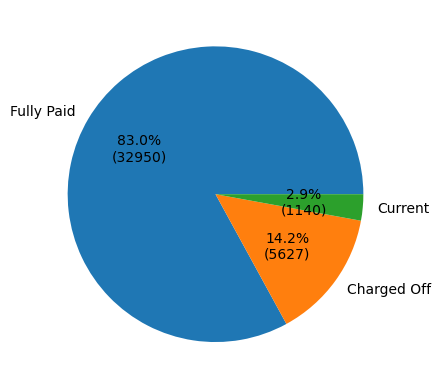

__Removing undeterministic value__

In [70]:
#Removing loan status as current as it doesn't provide input to problem statement
loan.drop(loan[loan['loan_status']== 'Current'].index, inplace = True)
loan.shape
final_loan_data_cleaned=loan
final_loan_data_cleaned.dtypes

id                        int64
member_id                 int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                      int32
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

#### Data Analysis

##### Data Undestanding after cleaning
__Checking number of categorical and numerical columns available__

In [60]:
numeric_data = final_loan_data_cleaned.select_dtypes(include = [np.number])

categorical_data = final_loan_data_cleaned.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features in the loan data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 11 numerical and 10 categorical features in the loan data


###### Univariate Analysis

In [74]:
final_loan_data_cleaned.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,41.898437,11.932219,322.466318,6.877797e+04,13.272727,0.043238
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,10.333136,3.691327,208.639215,6.421868e+04,6.673044,0.204159
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,36.000000,8.940000,165.740000,4.000000e+04,8.130000,0.000000
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,36.000000,11.710000,277.860000,5.886800e+04,13.370000,0.000000
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,36.000000,14.380000,425.550000,8.200000e+04,18.560000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,6.000000e+06,29.990000,2.000000


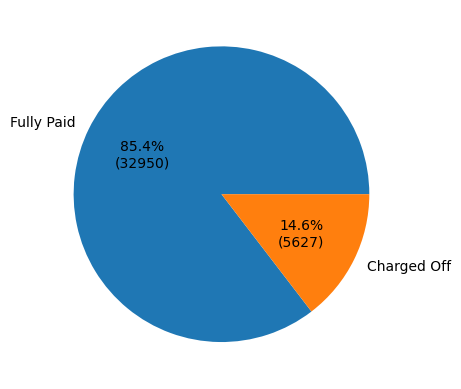

In [76]:
final_loan=final_loan_data_cleaned['loan_status'].value_counts()
plt.pie(final_loan,labels = final_loan.index,autopct=autopct_format(final_loan))
plt.show()

__Checking All numerical variables__

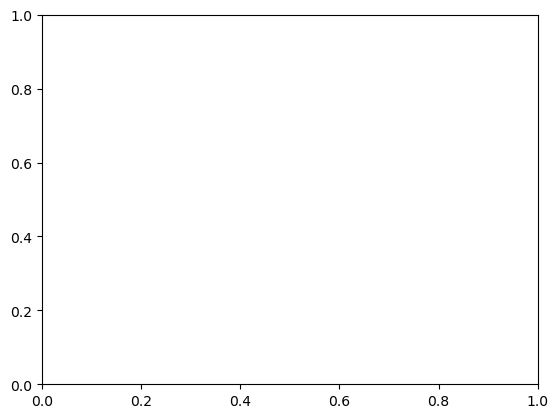

In [81]:
fig,ax=plt.subplots()
loan_amnt=final_loan_data_cleaned['loan_amnt']
funded_amnt=final_loan_data_cleaned['funded_amnt']
funded_amnt_inv=final_loan_data_cleaned['funded_amnt_inv']
#loan_details_comparison=ax.boxplot(loan_amnt,funded_amnt,funded_amnt_inv)
#final_loan_data_cleaned.boxplot(['loan_amnt','funded_amnt','funded_amnt_inv'])